# Problem set - DEM 


### Stylised facts of the business cycle

In [1]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [3]:
from fredapi import Fred
fred = Fred(api_key='25400ff00f45200a6b52344af538c912')

# Table 1

## Recreating the table
Getting the values for CND non-durable consumption, CD durable
consumption, H total hours worked, AveH average hours worked per employee, L employment,
GNP/L productivity, AveW average hourly wage based on national accounts.

In [4]:
gnp = fred.get_series('GNP', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q")
gnp.name = 'gnp'
gnp.tail()

2021-01-01    22511.170
2021-04-01    23192.674
2021-07-01    23718.255
2021-10-01    24530.587
2022-01-01    24929.184
Name: gnp, dtype: float64

In [59]:
gnp

1964-01-01      674.880
1964-04-01      683.549
1964-07-01      697.079
1964-10-01      702.017
1965-01-01      723.225
                ...    
2022-01-01    24929.184
2022-04-01    25456.409
2022-07-01    25885.432
2022-10-01    26289.489
2023-01-01    26592.668
Name: gnp, Length: 237, dtype: float64

In [5]:
pcend = fred.get_series('PCEND', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # non durable consumption
pcend.name = 'pcend'

In [6]:
pcedg = fred.get_series('PCEDG', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # durable consumption
pcedg.name = 'pcedg'

In [7]:
h = fred.get_series('LNU02032200', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Total At Work in Nonagricultural Industries
h.name = 'hours_worked'

In [96]:
ave_h = fred.get_series('M08304USM310NNBR', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") #  Average Hours of Work Per Week, Nonagricultural Employment, Household Survey for United States
ave_h.name = 'average_worked'

In [8]:
l = fred.get_series('CE16OV', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Employment level
l.name = 'employment'

In [9]:
gnp_l = gnp / l
gnp_l.name = 'productivity'

In [10]:
ave_w = fred.get_series('AHETPI', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Average Hourly Earnings of Production and Nonsupervisory Employees
ave_w.name = 'average_wage'

In [100]:
pop = pd.concat([gnp, pcend, h, l, pcedg, ave_h, gnp_l, ave_w], axis = 1)
pop

,gnp,pcend,hours_worked,employment,pcedg,average_worked,productivity,average_wage
1964-01-01,674.880,148.6,6747.0,68614.0,58.0,39.6,0.009836,2.50
1964-04-01,683.549,151.5,6788.0,69402.0,59.5,40.1,0.009849,2.52
1964-07-01,697.079,154.9,5225.0,69480.0,61.3,40.4,0.010033,2.55
1964-10-01,702.017,155.8,7033.0,69710.0,59.4,40.2,0.010071,2.56
1965-01-01,723.225,157.8,6903.0,70188.0,64.9,40.0,0.010304,2.59
...,...,...,...,...,...,...,...,...
2021-01-01,22511.170,3274.4,18605.0,150276.0,1990.9,NaN,0.149799,25.26
2021-04-01,23192.674,3416.4,19199.0,151446.0,2113.5,NaN,0.153142,25.66
2021-07-01,23718.255,3482.1,18968.0,153287.0,2035.0,NaN,0.154731,26.12
2021-10-01,24530.587,3572.1,20676.0,155337.0,2101.6,NaN,0.157919,26.59


In [164]:
tabella = pop.transpose()

In [157]:
tab = tabella[['2006-04-01']]
tab

,2006-04-01
gnp,13802.877000
pcend,2076.800000
hours_worked,19105.000000
employment,144068.000000
pcedg,1149.200000
average_worked,NaN
productivity,0.095808
average_wage,16.670000


In [160]:
selected_values = tabella.loc[:,'2006-04-01':'2008-04-01']
selected_values

,2006-04-01,2006-07-01,2006-10-01,2007-01-01,2007-04-01,2007-07-01,2007-10-01,2008-01-01,2008-04-01
gnp,13802.877000,13906.646000,14083.697000,14258.594000,14463.277000,14681.751000,14875.943000,14857.342000,15023.210000
pcend,2076.800000,2112.900000,2092.800000,2129.100000,2166.100000,2188.200000,2232.600000,2252.900000,2305.800000
hours_worked,19105.000000,17913.000000,20338.000000,20036.000000,19424.000000,18196.000000,20019.000000,19522.000000,19226.000000
employment,144068.000000,144547.000000,145606.000000,146135.000000,145851.000000,145944.000000,146271.000000,146207.000000,145926.000000
pcedg,1149.200000,1160.500000,1169.400000,1179.000000,1185.700000,1191.900000,1195.600000,1153.500000,1137.700000
average_worked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productivity,0.095808,0.096208,0.096725,0.097571,0.099165,0.100599,0.101701,0.101619,0.102951
average_wage,16.670000,16.820000,16.990000,17.150000,17.340000,17.500000,17.630000,17.810000,17.980000


In [171]:
std_dev = np.std(selected_values)

In [174]:
selected_values.loc['Standard Deviation'] = std_dev
selected_values

C:\Users\Michela\anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,2006-04-01 00:00:00,2006-07-01 00:00:00,2006-10-01 00:00:00,2007-01-01 00:00:00,2007-04-01 00:00:00,2007-07-01 00:00:00,2007-10-01 00:00:00,2008-01-01 00:00:00,2008-04-01 00:00:00,Standard Deviation
gnp,13802.877000,13906.646000,14083.697000,14258.594000,14463.277000,14681.751000,14875.943000,14857.342000,15023.210000,NaN
pcend,2076.800000,2112.900000,2092.800000,2129.100000,2166.100000,2188.200000,2232.600000,2252.900000,2305.800000,NaN
hours_worked,19105.000000,17913.000000,20338.000000,20036.000000,19424.000000,18196.000000,20019.000000,19522.000000,19226.000000,NaN
employment,144068.000000,144547.000000,145606.000000,146135.000000,145851.000000,145944.000000,146271.000000,146207.000000,145926.000000,NaN
pcedg,1149.200000,1160.500000,1169.400000,1179.000000,1185.700000,1191.900000,1195.600000,1153.500000,1137.700000,NaN
average_worked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productivity,0.095808,0.096208,0.096725,0.097571,0.099165,0.100599,0.101701,0.101619,0.102951,NaN
average_wage,16.670000,16.820000,16.990000,17.150000,17.340000,17.500000,17.630000,17.810000,17.980000,NaN
Standard Deviation,46290.380680,46474.692489,46752.517840,46923.912999,46834.227973,46888.823329,46934.875660,46929.264059,46835.111353,NaN


# Table 2

## Recreating the table
Getting the values for Y per capita output, C per capita consumption, I per capita investment, N
per capita hours, w the real wage (compensation per hour), r the real interest rate, and A total
factor productivity.

In [12]:
y = fred.get_series('PRS85006161', observation_start = '1982-01-01', observation_end = '2022-01-01', frequency = "q") # Output per capita
y.name = 'output_per_capita'

In [31]:
c = fred.get_series('A794RX0Q048SBEA', observation_start = '1982-01-01', observation_end = '2022-01-01', frequency = "q") # Consumption per capita
c.name = 'consumption_per_capita'

In [25]:
i = fred.get_series('A795RC0Q052SBEA', observation_start = '1982-01-01', observation_end = '2022-01-01', frequency = "q") # Investment per capita
i.name = 'investment_per_capita'

In [15]:
n = fred.get_series('M08304USM310NNBR', observation_start = '1982-01-01', observation_end = '2022-01-01', frequency = "q") #  Average Hours of Work Per Week, Nonagricultural Employment, Household Survey for United States
n.name = 'hours_per_capita'

In [17]:
r = fred.get_series('REAINTRATREARAT10Y', observation_start = '1982-01-01', observation_end = '2022-01-01', frequency = "q") # Real interest filter
r.name = 'real_interest_rate'

In [117]:
#a = fred.get_series('CTFPPPUSA669NRUG', observation_start = '1982-01-01', observation_end = '2022-01-01', frequency = "q") # 
#a.name = 'total_factor_productivity'

In [32]:
pap = pd.concat([y, c, i, n, r], axis = 1)
pap

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,real_interest_rate
1982-01-01,-3.5,18711.0,1065.0,NaN,7.469795
1982-04-01,-1.1,18726.0,1075.0,NaN,7.357922
1982-07-01,-1.5,18804.0,1084.0,NaN,6.982003
1982-10-01,0.2,19086.0,1134.0,NaN,5.929036
1983-01-01,3.3,19236.0,1151.0,NaN,5.659644
...,...,...,...,...,...
2021-01-01,6.6,40323.0,5997.0,NaN,-0.151111
2021-04-01,4.8,41468.0,6363.0,NaN,0.049777
2021-07-01,0.5,41730.0,6121.0,NaN,-0.140236
2021-10-01,1.7,42014.0,6315.0,NaN,0.114529


In [38]:
sum_consumption = pap['consumption_per_capita'].sum()
pap['consumption_per_capita'] = (pap['consumption_per_capita'] / sum_consumption) * 100
sum_investment = pap['investment_per_capita'].sum()
pap['investment_per_capita'] = (pap['investment_per_capita'] / sum_investment) * 100
pap

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,real_interest_rate
1982-01-01,-3.5,0.382556,0.213477,NaN,7.469795
1982-04-01,-1.1,0.382863,0.215482,NaN,7.357922
1982-07-01,-1.5,0.384458,0.217286,NaN,6.982003
1982-10-01,0.2,0.390223,0.227308,NaN,5.929036
1983-01-01,3.3,0.393290,0.230716,NaN,5.659644
...,...,...,...,...,...
2021-01-01,6.6,0.824425,1.202088,NaN,-0.151111
2021-04-01,4.8,0.847835,1.275452,NaN,0.049777
2021-07-01,0.5,0.853192,1.226943,NaN,-0.140236
2021-10-01,1.7,0.858998,1.265830,NaN,0.114529


### Standard deviation

In [106]:
std_dev_table2 = pap.std()
std_dev_table2
dict1 = {'output_per_capita': [1.665725],
       'consumption_per_capita': [0.130310],
       'investment_per_capita': [0.231690],
       'hours_per_capita': [0],
       'real_interest_rate': [1.882941]}
std_data = pd.DataFrame(dict1)
std_data.index = ['standard_deviation']
std_d = std_data.transpose()
std_d

,standard_deviation
output_per_capita,1.665725
consumption_per_capita,0.130310
investment_per_capita,0.231690
hours_per_capita,0.000000
real_interest_rate,1.882941


### Relative standard deviation

In [44]:
mean = pap.mean()
mean

output_per_capita         1.849689
consumption_per_capita    0.621118
investment_per_capita     0.621118
hours_per_capita               NaN
real_interest_rate        2.485438
dtype: float64

In [107]:
rstd_dev = (std_dev_table2 * 100) / mean
rstd_dev
dict2 = {'output_per_capita': [90.054319],
       'consumption_per_capita': [20.979884],
       'investment_per_capita': [37.302160],
       'hours_per_capita': [0],
       'real_interest_rate': [75.758920]}
rstd_data = pd.DataFrame(dict2)
rstd_data.index = ['relative_standard_deviation']
rstd_d = rstd_data.transpose()
rstd_d

,relative_standard_deviation
output_per_capita,90.054319
consumption_per_capita,20.979884
investment_per_capita,37.302160
hours_per_capita,0.000000
real_interest_rate,75.758920


### First Order Correlation
Plotting the correlation between the variables from 1982 to 2022

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

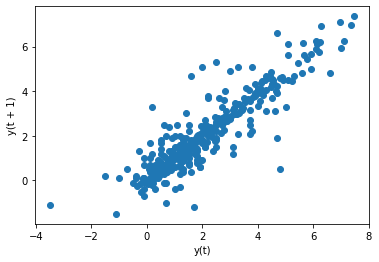

In [49]:
pd.plotting.lag_plot(pap, lag=1)

In [51]:
lol = pap.corr()
lol

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,real_interest_rate
output_per_capita,1.000000,-0.024698,0.031429,NaN,0.005745
consumption_per_capita,-0.024698,1.000000,0.967460,NaN,-0.929780
investment_per_capita,0.031429,0.967460,1.000000,NaN,-0.879104
hours_per_capita,NaN,NaN,NaN,NaN,NaN
real_interest_rate,0.005745,-0.929780,-0.879104,NaN,1.000000


### Contemporanous correlation

In [74]:
columns_to_correlate = ['output_per_capita', 'consumption_per_capita', 'investment_per_capita', 'hours_per_capita','real_interest_rate']
for column in columns_to_correlate:
    correlation = pap['output_per_capita'].corr(pap[column])
    print(correlation)

1.0
-0.024697552024283316
0.03142948301988155
nan
0.005745376648519888


In [111]:
dict = {'output_per_capita': [1.0],
       'consumption_per_capita': [-0.024697552024283316],
       'investment_per_capita': [0.03142948301988155],
       'hours_per_capita': [0],
       'real_interest_rate': [0.005745376648519888]}
corr_data = pd.DataFrame(dict)
corr_data.index = ['correlation_with_output']
corr_data
hello = corr_data.transpose()
hello

,correlation_with_output
output_per_capita,1.000000
consumption_per_capita,-0.024698
investment_per_capita,0.031429
hours_per_capita,0.000000
real_interest_rate,0.005745


### Final table 2

In [112]:
final2 = pd.concat([std_d, rstd_d, hello], axis = 1)
final2

,standard_deviation,relative_standard_deviation,correlation_with_output
output_per_capita,1.665725,90.054319,1.000000
consumption_per_capita,0.130310,20.979884,-0.024698
investment_per_capita,0.231690,37.302160,0.031429
hours_per_capita,0.000000,0.000000,0.000000
real_interest_rate,1.882941,75.758920,0.005745
